# Case study with mixed images using the FICA implementation

In [19]:
#using Pkg
#Pkg.add("ImageView")
using Images, FileIO, Colors

## Loading the test images and converting them to a grayscale image
For this case study we used 2 cat pictures, they will be refered to as cat one and cat two by
order of appearance

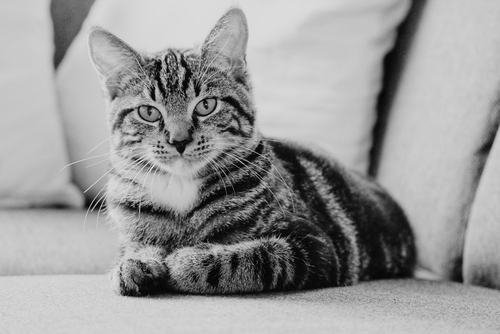

In [20]:
cat_one = load("cat_one_resize.jpg")
cat_oneg = Gray.(cat_one)

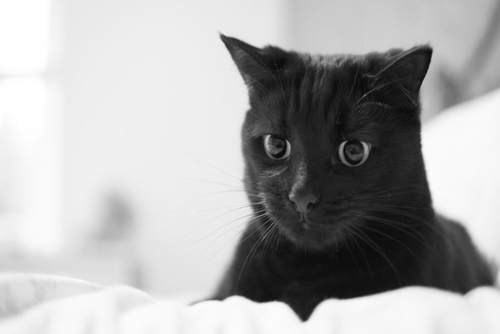

In [5]:
cat_two = load("cat_two_resize.jpg")
cat_twog = Gray.(cat_two)

## Mixing the images together to create 2 mixed images
For each image we use a different factor ( array A )
the first mixed image has a stronger presence from cat two and the second image a stronger presence from cat one

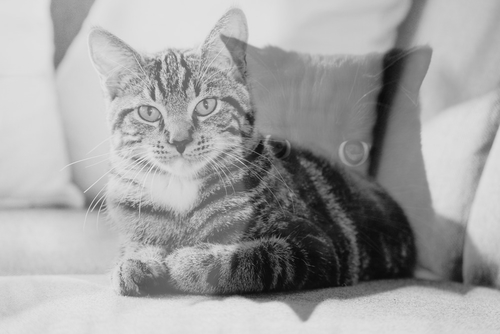

In [49]:
using LinearAlgebra
#convert image to array
mat_one = convert(Array{Float64},cat_oneg);
mat_two = convert(Array{Float64},cat_twog);
#get rows and column to later reconstruct the mixed image
rows,col = size(mat_one)
#convert 2D images to 1D (vector)
vec_one = vec(mat_one)';
vec_two = vec(mat_two)';

S = vcat(vec_one , vec_two)';

#generate first mixed signal
#factor used for the image
#A = [0.2 , 0.8] 
A = [0.6 , 0.4] 

X = (S .* A')'

X = X[1,:,]+X[2,:,]

imageX = reshape(X,rows,col)
img = colorview(Gray, imageX)

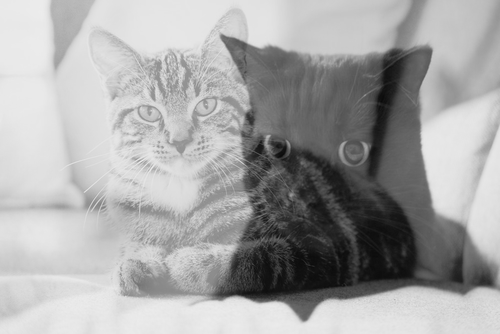

In [50]:
#generate second mixed signal
#factor used for the image
#A = [0.8 , 0.2] 
A = [0.4 , 0.6] 
Z = (S .* A')'

Z = Z[1,:,]+Z[2,:,]
mixed_signal = hcat(X,Z);
imageZ = reshape(Z,rows,col)
img = colorview(Gray,imageZ)


## Applying the FICA algorithm

In [25]:
include("fastICA.jl")

#forced weights
wei = [0.86456941 1.0646533 ; 0.07053282 0.8470662]

W = fastICA.whiten(mixed_signal)
X1 = mixed_signal * W'
#direct call to deflation function to pass weights
a = fastICA.fast_ica_def(200,2,Array(X1'),0.0001,wei, 1.)
#a = fastICA.fast_ica(200,2,Array(X1'),0.0001, 1.)
K = a * W
S = K * mixed_signal';

Component n 2
wp = [0.63039, 0.776279]
Tolerance change for iter 1 = 0.5337637201839851
wp = [0.980653, -0.195752]
Tolerance change for iter 2 = 0.005332292443664621
wp = [0.955236, -0.295844]
Tolerance change for iter 3 = 8.456355327091103e-7
retW = [0.95562 -0.294602; 0.0 0.0]
Component n 2
wp = [0.294602, 0.95562]
Tolerance change for iter 1 = 2.220446049250313e-16
retW = [0.95562 -0.294602; -0.294602 -0.95562]


## Results

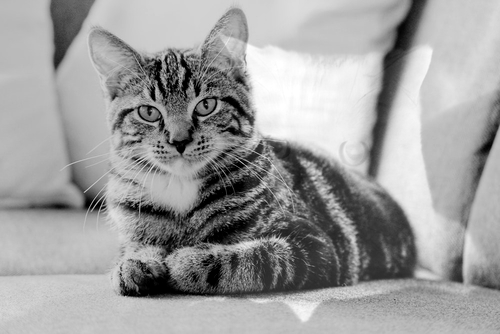

In [26]:
firstres = reshape(S[1,:,]+S[2,:,],rows,col)
scale = scaleminmax(round(Int8,minimum(firstres)),round(Int8,maximum(firstres)))
img = colorview(Gray, scale.(firstres))

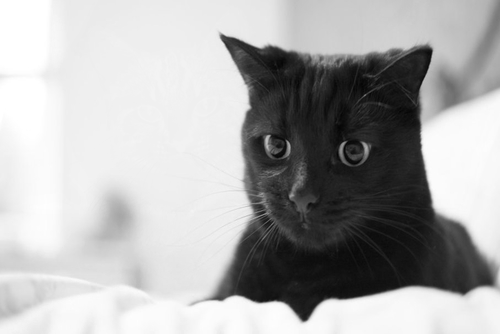

In [27]:
secondres = reshape(S[1,:,]-S[2,:,],rows,col)
scale = scaleminmax(round(Int8,minimum(secondres)),round(Int8,maximum(secondres)))
img = colorview(Gray, scale.(secondres))

In [77]:
function mserror(A,B,width,height) sum = 0.0
    for x = 1:width
       for y = 1:height
          difference = (A[x,y] - B[x,y])
          sum = sum + difference*difference
        end
    end
    mse = sum /(width*height)
    println("The mean square error is $mse")
end          

mserror (generic function with 1 method)

In [81]:
mserror(cat_twog,secondres,rows,col)

The mean square error is 5.313723128611823


In [79]:
mserror(cat_oneg,firstres,rows,col)

The mean square error is 5.865758379988999
